

 # Detección y Dibujo de Contornos con OpenCV
 En este tutorial, exploraremos cómo detectar y dibujar contornos en imágenes usando OpenCV. Los contornos son formas cerradas que representan los límites de los objetos en la imagen y son fundamentales en muchas aplicaciones de visión computacional, como la segmentación de objetos.



 ## 1. Importación de Bibliotecas
 Comenzamos importando las bibliotecas necesarias: `cv2` para procesamiento de imágenes y `numpy` para manejar matrices. Usaremos `matplotlib` para visualizar las imágenes.

In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline



 ## 2. Función para Mostrar Imágenes
 Definimos una función para mostrar imágenes utilizando `matplotlib` para poder visualizar los resultados en cada paso del tutorial.

In [7]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)



 ## 3. Cargar y Visualizar la Imagen
 Cargamos la imagen que vamos a utilizar (`pine_apple.jpg`) y la mostramos para ver cómo es antes de aplicar cualquier procesamiento.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


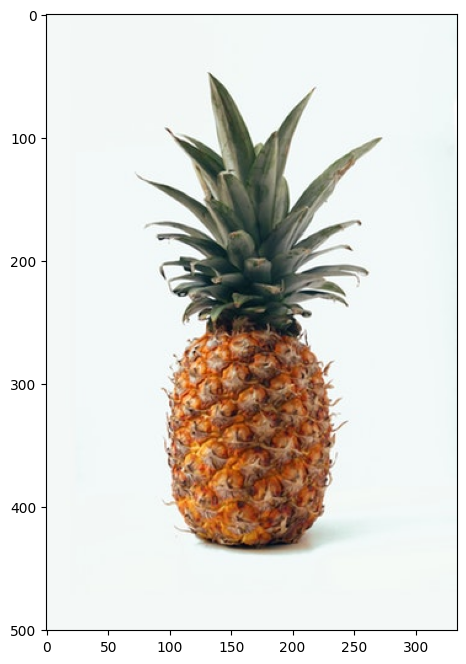

In [53]:

# Cargar la imagen
dir = '/content/drive/MyDrive/CursoProcesamiento/Clase05'
img = cv2.imread(dir + '/pine_apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)

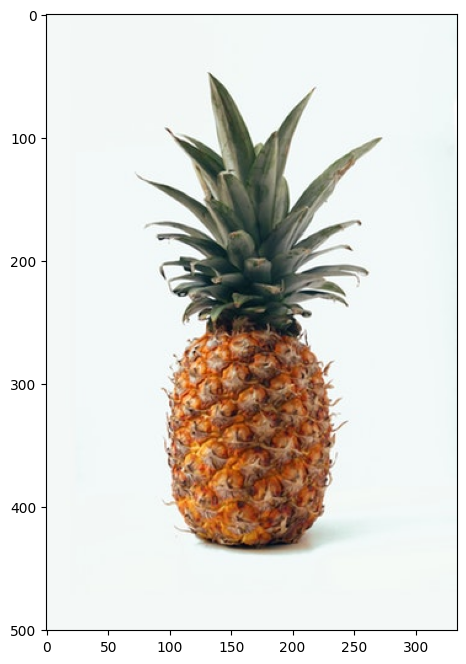

In [13]:
# Cargar la imagen
img = cv2.imread('/content/pine_apple.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(img)


## 4. Preprocesamiento de la Imagen
 Antes de detectar contornos, es necesario convertir la imagen a escala de grises y aplicar un umbral. También aplicamos un desenfoque para reducir el ruido y mejorar la precisión de la detección de contornos.



 ### 1. Aplicar Desenfoque Bilateral
 Usamos un desenfoque bilateral para suavizar la imagen mientras preservamos los bordes importantes. Esto es especialmente útil en imágenes donde queremos detectar contornos con precisión sin perder detalles importantes.

 **Parámetros utilizados**:
 - `d=7`: Diámetro de cada píxel en el vecindario para el cálculo del desenfoque.
 - `sigmaSpace=75`: Determina cuánto influyen los píxeles cercanos a la hora de aplicar el desenfoque. Un valor más alto considera más píxeles.
 - `sigmaColor=75`: Controla cuánto afecta la diferencia de color entre los píxeles al desenfoque. Un valor alto mantiene los bordes nítidos.

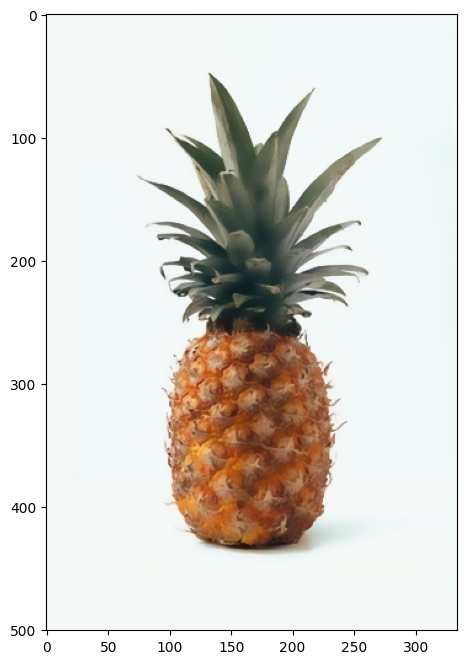

In [33]:
# %%

# Aplicar desenfoque bilateral
img_blur = cv2.bilateralFilter(img, d=12, sigmaSpace=75, sigmaColor=75)
display(img_blur)


 ### 2. Convertir la Imagen a Escala de Grises
 Para detectar contornos de manera eficiente, convertimos la imagen a escala de grises. Esto simplifica el procesamiento ya que la imagen pasa a tener solo intensidades de gris en lugar de colores RGB.

 Utilizamos la función `cv2.cvtColor()` con el parámetro `cv2.COLOR_RGB2GRAY` para esta conversión.

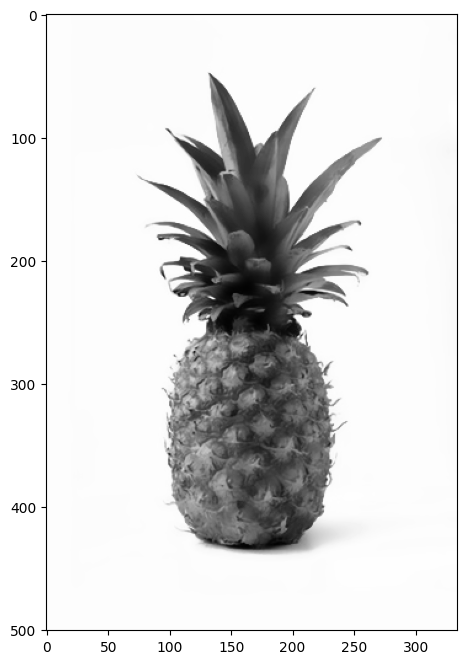

In [34]:

# Convertir a escala de grises
img_gray = cv2.cvtColor(img_blur, cv2.COLOR_RGB2GRAY)
display(img_gray, cmap='gray')


 ### 3. Aplicar Umbral
 Aplicamos un umbral binario inverso para resaltar los contornos en la imagen. El umbral separa los píxeles claros (blancos) de los oscuros (negros), lo cual es útil para encontrar contornos en imágenes binarias.

 **Explicación de los valores**:
 - `a = img_gray.max()`: Se obtiene el valor máximo de intensidad en la imagen en escala de grises, que se usará como referencia.
 - `a/2 + 60`: Este valor se usa como umbral. Es la mitad del valor máximo de intensidad más un ajuste de 60 para controlar qué tan claros deben ser los píxeles para ser considerados como fondo (negro). Ajustar este valor puede ayudar a mejorar la detección de contornos en diferentes condiciones de luz y contraste.
 - `cv2.THRESH_BINARY_INV`: Este tipo de umbral invierte la imagen, haciendo que las áreas claras se vuelvan negras y las áreas oscuras se vuelvan blancas, lo que facilita la detección de contornos en el siguiente paso.

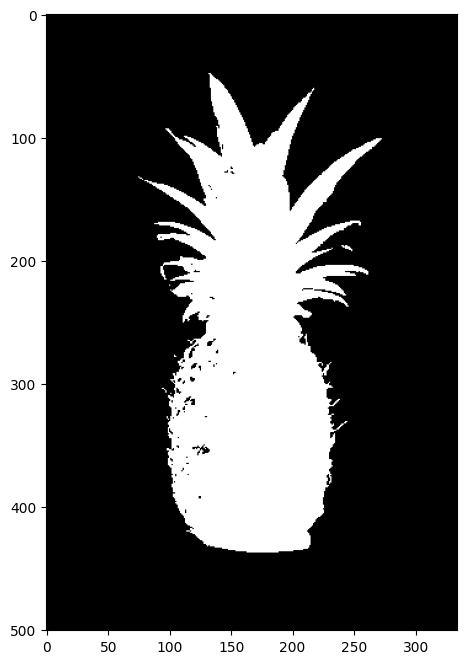

In [35]:
# %%

# Aplicar el umbral
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a/2 + 60, a, cv2.THRESH_BINARY_INV)
display(thresh, cmap='gray')


 ## 5. Detección de Contornos
 Usamos `cv2.findContours()` para detectar los contornos en la imagen umbralizada. Esta función devuelve una lista de contornos encontrados y su jerarquía.
 ### 1. Parámetros de la Función `cv2.findContours()`

 La función `cv2.findContours()` se utiliza para detectar contornos en una imagen binarizada (generalmente generada mediante un umbral). Los contornos son las fronteras o límites de los objetos presentes en la imagen.

 **Parámetros**:
 - **`thresh`**: Es la imagen binaria (en blanco y negro) en la que se buscarán los contornos. Esta imagen debe ser el resultado de un proceso de umbralización, como el que vimos anteriormente con `cv2.threshold()`.
 - **`mode`**: Determina cómo se recuperan los contornos. En este caso, se usa `cv2.RETR_TREE`.
 - **`method`**: Especifica cómo se aproximan los contornos detectados. Aquí se usa `cv2.CHAIN_APPROX_SIMPLE`.

 Vamos a desglosar `mode` y `method` en detalle.


 #### 2. `mode` en `cv2.findContours()`

 - **`cv2.RETR_TREE`**: Este modo recupera todos los contornos de la imagen y construye una jerarquía de contornos anidados. Es útil cuando quieres analizar la estructura jerárquica de los contornos (por ejemplo, cuando un contorno está dentro de otro).

 Otros modos disponibles son:
 - `cv2.RETR_EXTERNAL`: Solo recupera los contornos externos más grandes (contornos de nivel superior).
 - `cv2.RETR_LIST`: Recupera todos los contornos sin crear ninguna relación jerárquica entre ellos.
 - `cv2.RETR_CCOMP`: Recupera todos los contornos y los organiza en dos niveles: el de los contornos externos y el de los contornos internos (agujeros).

 Usamos `cv2.RETR_TREE` porque queremos analizar todos los contornos y cómo se relacionan entre sí jerárquicamente.


 #### 3. `method` en `cv2.findContours()`

 - **`cv2.CHAIN_APPROX_SIMPLE`**: Este método de aproximación de contornos guarda solo los puntos finales de los segmentos de línea que forman el contorno. Esto reduce la cantidad de puntos guardados y, por lo tanto, optimiza el procesamiento y almacenamiento.

 Otros métodos disponibles son:
 - `cv2.CHAIN_APPROX_NONE`: Almacena todos los puntos del contorno, lo cual resulta en más detalles, pero también en un mayor uso de memoria.

 Elegimos `cv2.CHAIN_APPROX_SIMPLE` para simplificar y optimizar la cantidad de puntos que se guardan para cada contorno.


 ###  ¿Qué Devuelve `cv2.findContours()`?

 La función devuelve dos valores:
 - **`contours`**: Es una lista de contornos encontrados. Cada contorno es un array de puntos (coordenadas x, y) que representan la forma del contorno.
 - **`hierarchy`**: Es una matriz que describe la relación jerárquica entre los contornos detectados. Contiene información sobre los contornos "padre" e "hijo", útil si hay contornos anidados en la imagen.

 Ahora, vamos a ejecutar la línea de código y ver los resultados.

In [36]:

# Detectar contornos en la imagen
contours, hierarchy = cv2.findContours(thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

# Imprimir el número de contornos encontrados
print("Número de Contornos Encontrados: ", len(contours))

Número de Contornos Encontrados:  77


In [37]:
contours

(array([[[ 98, 327]],
 
        [[ 98, 328]],
 
        [[ 99, 329]],
 
        [[ 98, 328]]], dtype=int32),
 array([[[101, 308]]], dtype=int32),
 array([[[ 94, 304]],
 
        [[ 95, 304]],
 
        [[ 97, 306]],
 
        [[ 97, 307]],
 
        [[ 97, 306]],
 
        [[ 95, 304]]], dtype=int32),
 array([[[104, 277]],
 
        [[104, 278]],
 
        [[105, 278]]], dtype=int32),
 array([[[100, 220]]], dtype=int32),
 array([[[240, 188]],
 
        [[241, 189]],
 
        [[242, 189]],
 
        [[243, 190]],
 
        [[245, 190]],
 
        [[246, 191]],
 
        [[247, 191]],
 
        [[248, 192]],
 
        [[248, 191]],
 
        [[246, 189]],
 
        [[245, 189]],
 
        [[244, 188]],
 
        [[243, 188]],
 
        [[242, 189]],
 
        [[241, 188]]], dtype=int32),
 array([[[ 75, 132]],
 
        [[ 76, 133]],
 
        [[ 77, 133]],
 
        [[ 78, 134]],
 
        [[ 77, 133]],
 
        [[ 76, 133]]], dtype=int32),
 array([[[132,  48]],
 
        [[133,  49]],

In [38]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [-1,  6,  8, -1],
        [ 9, -1, -1,  7],
        [10,  8, -1,  7],
        [11,  9, -1,  7],
        [12, 10, -1,  7],
        [13, 11, -1,  7],
        [14, 12, -1,  7],
        [15, 13, -1,  7],
        [16, 14, -1,  7],
        [17, 15, -1,  7],
        [18, 16, -1,  7],
        [19, 17, -1,  7],
        [20, 18, -1,  7],
        [21, 19, -1,  7],
        [22, 20, -1,  7],
        [23, 21, -1,  7],
        [24, 22, -1,  7],
        [25, 23, -1,  7],
        [26, 24, -1,  7],
        [27, 25, -1,  7],
        [28, 26, -1,  7],
        [29, 27, -1,  7],
        [30, 28, -1,  7],
        [31, 29, -1,  7],
        [32, 30, -1,  7],
        [33, 31, -1,  7],
        [34, 32, -1,  7],
        [35, 33, -1,  7],
        [36, 34, -1,  7],
        [37, 35, -1,  7],
        [38, 36, -1,  7],
        [39,

In [39]:
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [40]:
contours

[array([[[132,  48]],
 
        [[133,  49]],
 
        [[133,  59]],
 
        ...,
 
        [[139,  53]],
 
        [[138,  53]],
 
        [[133,  48]]], dtype=int32),
 array([[[127, 350]],
 
        [[128, 351]],
 
        [[128, 352]],
 
        [[129, 353]],
 
        [[128, 352]],
 
        [[129, 351]],
 
        [[130, 351]],
 
        [[133, 354]],
 
        [[133, 355]],
 
        [[131, 357]],
 
        [[129, 357]],
 
        [[128, 358]],
 
        [[127, 358]],
 
        [[126, 357]],
 
        [[126, 356]],
 
        [[127, 355]],
 
        [[126, 354]],
 
        [[125, 355]],
 
        [[124, 354]],
 
        [[124, 353]]], dtype=int32),
 array([[[119, 270]],
 
        [[121, 272]],
 
        [[121, 273]],
 
        [[120, 274]],
 
        [[119, 274]],
 
        [[119, 278]],
 
        [[117, 280]],
 
        [[116, 280]],
 
        [[115, 279]],
 
        [[115, 276]],
 
        [[116, 275]],
 
        [[116, 274]],
 
        [[117, 273]],
 
        [[117, 272]]], 


 ## 6. Dibujo de Contornos
 Dibujamos los contornos encontrados sobre la imagen original usando `cv2.drawContours()` para visualizarlos.

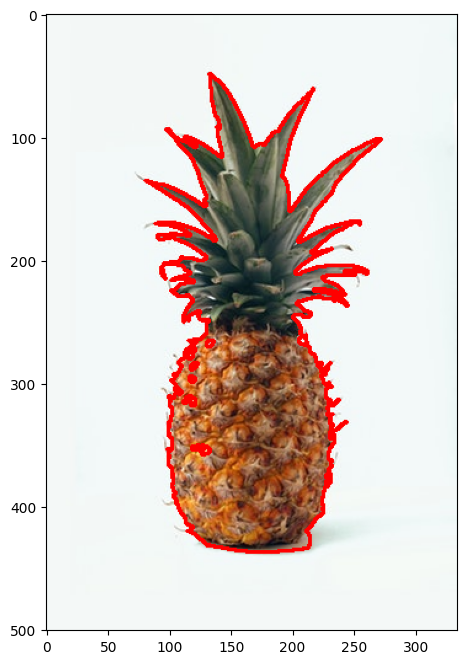

In [54]:

# Crear una copia de la imagen para dibujar los contornos
#no modificas el img y tienes copia donde vas a poder mpdificarlo sin necesidad de modificar la origina .copy()
img_copy = img.copy()

# Dibujar los contornos
final = cv2.drawContours(img_copy, contours, contourIdx=-1, color=(255, 0, 0), thickness=2)
display(final)


 ## 7. Momentos de Imagen y Centroide
 Podemos calcular el centroide y otras propiedades de los contornos usando los momentos de imagen con `cv2.moments()`.

In [45]:
# %%

# Obtener el primer contorno
c_0 = contours[0]

# Calcular los momentos de la imagen
M = cv2.moments(c_0)
print("Momentos de la Imagen:", M)

# Calcular el centroide
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])
print("Centroide: (", cx, ",", cy, ")")

Momentos de la Imagen: {'m00': 37448.5, 'm10': 6253659.666666666, 'm01': 10068987.5, 'm20': 1088463060.25, 'm11': 1678190045.7916665, 'm02': 3070175800.083333, 'm30': 196698739827.0, 'm21': 291529181231.1, 'm12': 510944611077.0, 'm03': 1014946987000.05, 'mu20': 44141946.547356844, 'mu11': -3266381.379537344, 'mu02': 362870853.9531474, 'mu30': 189534918.80029297, 'mu21': -41035810.72202492, 'mu12': 1415381.6954574585, 'mu03': -5682569296.696533, 'nu20': 0.031476223985554476, 'nu11': -0.0023291531064281576, 'nu02': 0.258751712831808, 'nu30': 0.0006983982890471913, 'nu21': -0.000151208759733208, 'nu12': 5.215398622655667e-06, 'nu03': -0.020939131951651882}
Centroide: ( 166 , 268 )



 ## 8. Área y Longitud del Contorno
 Calculamos el área y la longitud (perímetro) del contorno usando `cv2.contourArea()` y `cv2.arcLength()`.

In [46]:
# %%

# Calcular el área y la longitud del primer contorno
print("Área del Primer Contorno: ", cv2.contourArea(contours[0]))
print("Longitud del Primer Contorno (Cerrado): ", cv2.arcLength(contours[0], closed=True))
print("Longitud del Primer Contorno (Abierto): ", cv2.arcLength(contours[0], closed=False))

Área del Primer Contorno:  37448.5
Longitud del Primer Contorno (Cerrado):  2499.8043748140335
Longitud del Primer Contorno (Abierto):  2498.8043748140335



 ## 9. Dibujar Formas de Contorno Adicionales
 Podemos dibujar un rectángulo o un contorno convexo alrededor del objeto para visualizar otras formas de encuadrar el objeto.

In [49]:
print(x , y)

80 48


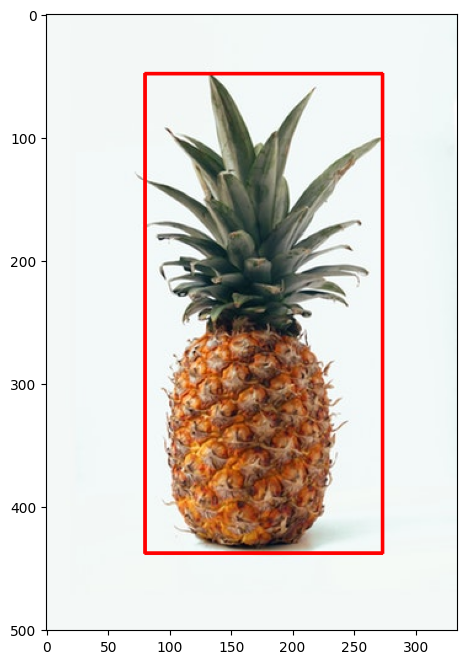

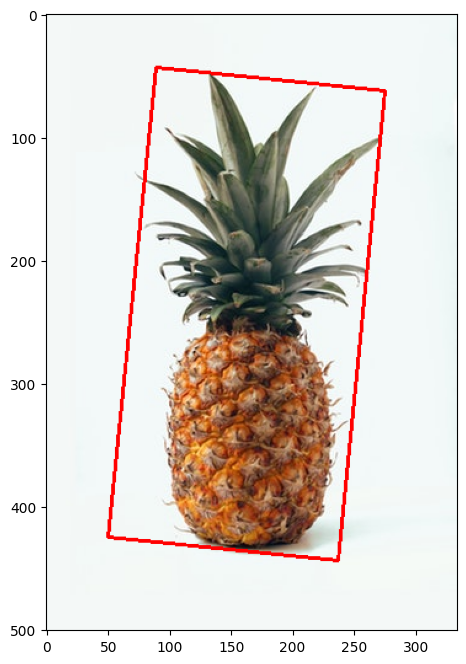

In [55]:
# %%

# Dibujar un rectángulo que encierra el contorno
x, y, w, h = cv2.boundingRect(c_0)
img_box = cv2.rectangle(img.copy(), (x, y), (x+w, y+h), color=(255, 0, 0), thickness=2)
display(img_box)

# Obtener el rectángulo de mínima área
rect = cv2.minAreaRect(c_0)
box = cv2.boxPoints(rect)
box = box.astype('int')
img_box_2 = cv2.drawContours(img.copy(), [box], contourIdx=-1, color=(255, 0, 0), thickness=2)
display(img_box_2)


 ## 10. Detección y Dibujo de Contorno Convexo
 Utilizamos `cv2.convexHull()` para dibujar el contorno convexo de la imagen.

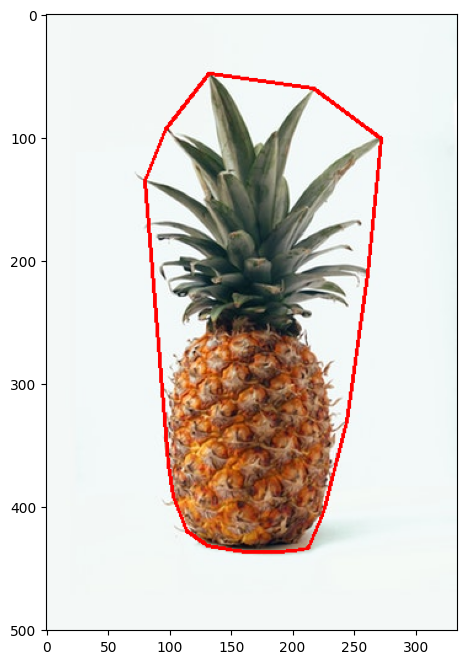

In [56]:

hull = cv2.convexHull(c_0)
img_hull = cv2.drawContours(img.copy(), [hull], contourIdx=0, color=(255, 0, 0), thickness=2)
display(img_hull)


 ## 11. Creación de Máscaras y Aplicación en Imágenes
 Para finalizar, aplicamos operaciones de enmascaramiento para fusionar la imagen de la piña con otra imagen (`backpacker.jpg`).

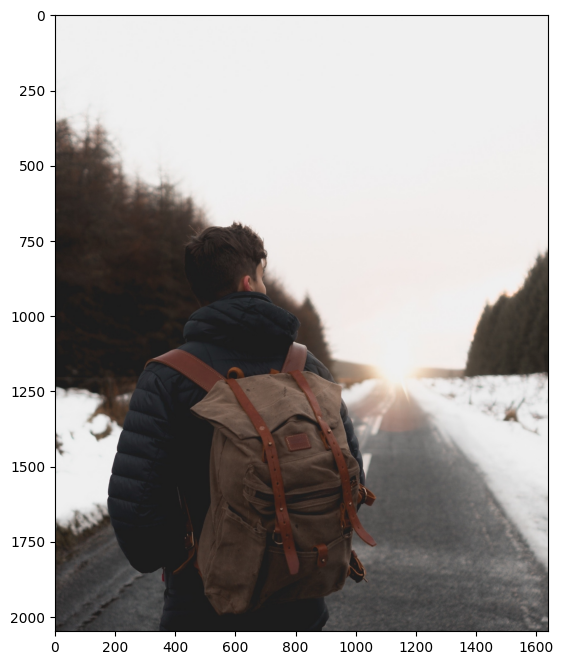

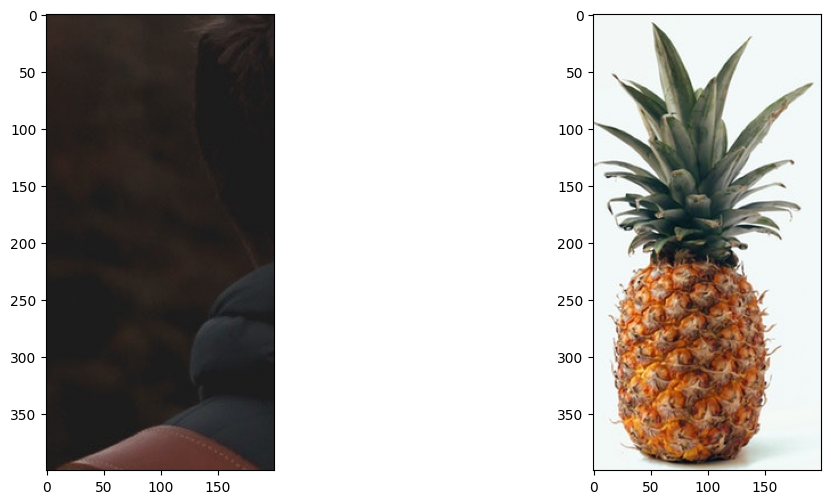

In [57]:
# %%

# Cargar la imagen del fondo
backpacker = cv2.imread('/content/backpacker.jpg')
backpacker = cv2.cvtColor(backpacker, cv2.COLOR_BGR2RGB)
display(backpacker)

# Recortar la región de interés (ROI) y la imagen pequeña
img_2 = img[40:440, 80:280]
roi = backpacker[750:1150, 300:500]

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1); plt.imshow(roi)
plt.subplot(1, 3, 3); plt.imshow(img_2)


 Creamos la máscara para la operación de fusión.

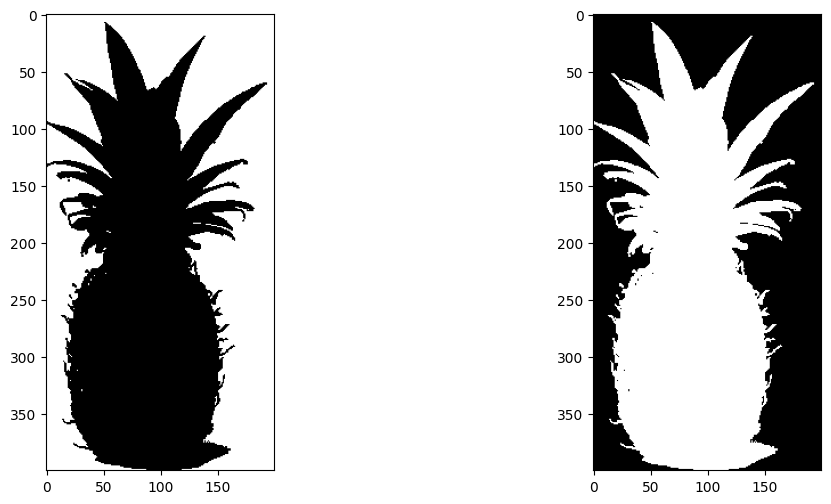

In [58]:
# %%

# Crear la máscara y su inversa
img_gray = cv2.cvtColor(img_2, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(img_gray, 254/2+100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1); plt.imshow(mask, cmap='gray')
plt.subplot(1, 3, 3); plt.imshow(mask_inv, cmap='gray')


 ## Resultado Final
 Combinamos las imágenes usando operaciones bit a bit y fusionamos la imagen de la piña en la imagen del mochilero.

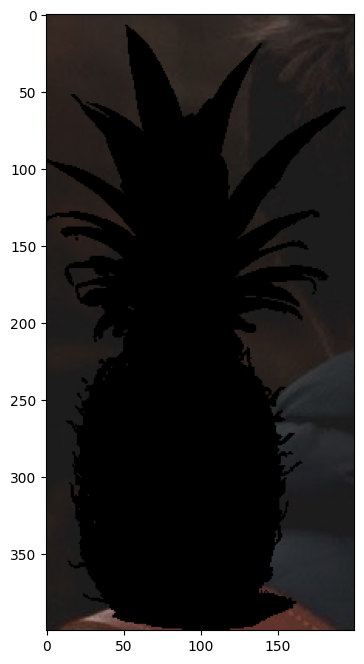

In [61]:
display(img_bg)

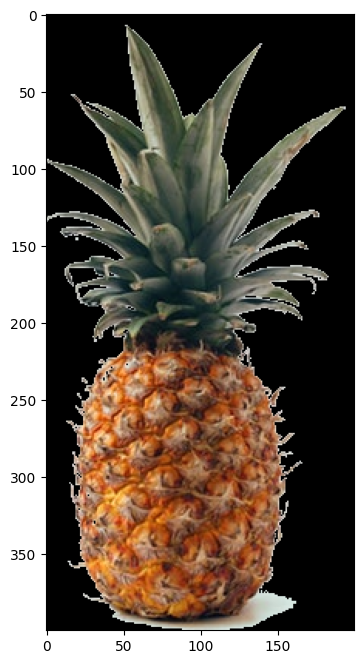

In [62]:
display(img_fg)

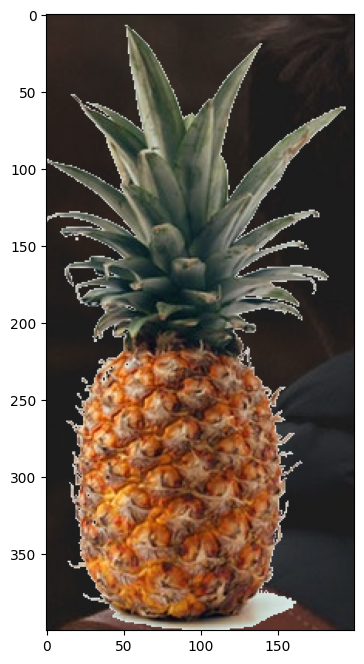

In [63]:
display(dst)

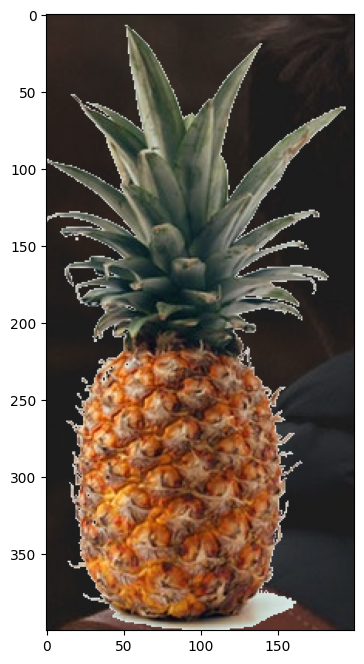

In [64]:
display(backpacker[750:1150, 300:500] )

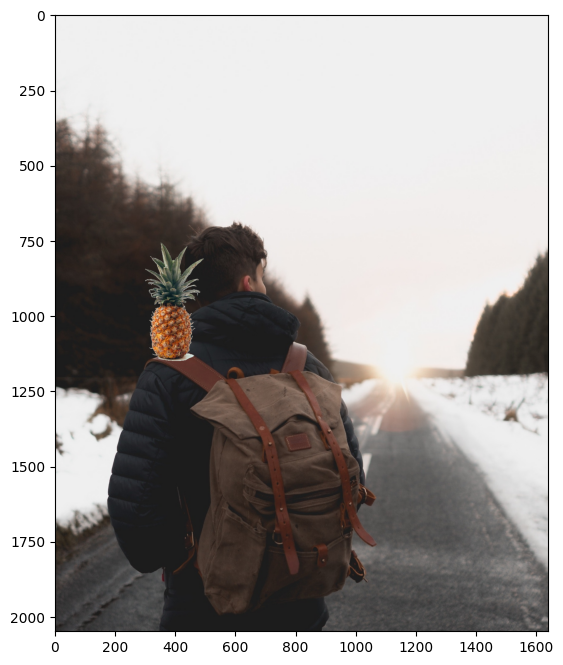

In [60]:
# %%
# cv2.bitwise_and( imagen recotrando, posicion , mask)
img_bg = cv2.bitwise_and(roi, roi , mask=mask)
img_fg = cv2.bitwise_and(img_2, img_2, mask=mask_inv)
dst = cv2.add(img_fg, img_bg)

backpacker[750:1150, 300:500] = dst
display(backpacker)


 Con esto, hemos completado el tutorial de detección y manipulación de contornos usando OpenCV. ¡Explora y experimenta con tus propias imágenes para entender mejor este poderoso concepto!


 # Detección y Dibujo de Contornos con OpenCV
 En este tutorial, aprenderemos cómo detectar y dibujar contornos en imágenes usando OpenCV. Los contornos son formas cerradas que representan los bordes de los objetos en una imagen y son muy útiles en visión computacional para tareas como la detección de objetos y la segmentación de imágenes.


 ## 1. Importación de las bibliotecas necesarias
 Utilizaremos OpenCV para la manipulación de imágenes y `matplotlib` para la visualización.

In [65]:
# %%

import cv2
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline


 ## 2. Cargar y Visualizar la Imagen
 Cargaremos una imagen (`bubblingFish.jpg`) y la visualizaremos para ver cómo es antes de realizar cualquier procesamiento.

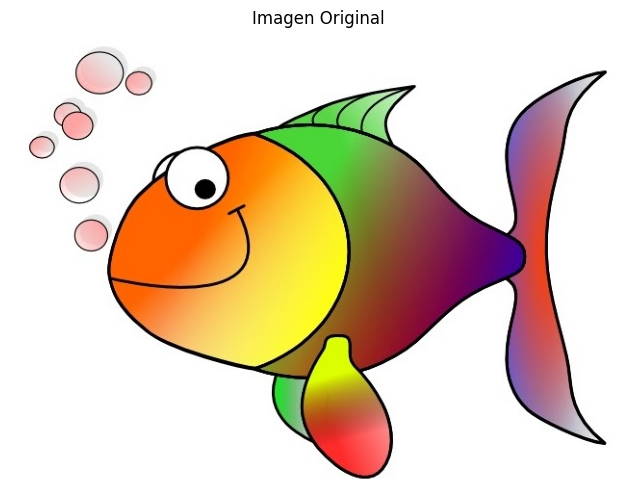

In [66]:
# %%

# Cargar la imagen
image = cv2.imread('/content/bubblingFish.jpg')


# Función para mostrar la imagen
def display_img(img, title="Imagen"):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Mostrar la imagen original
display_img(image, "Imagen Original")


 ## 3. Preprocesamiento de la Imagen
 Antes de detectar contornos, necesitamos preprocesar la imagen. Vamos a convertirla a escala de grises y aplicar un desenfoque para reducir el ruido.

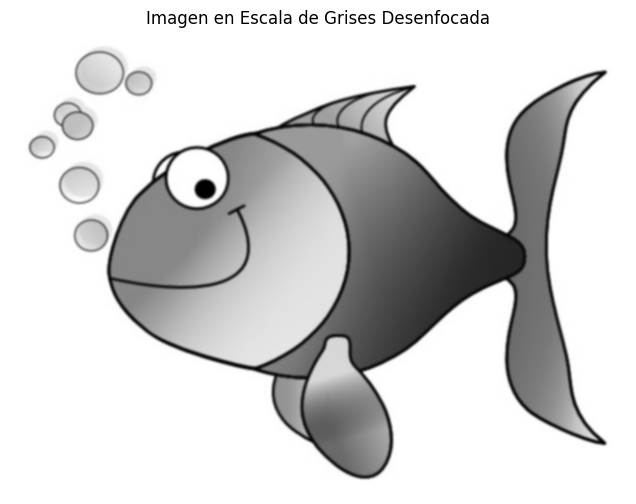

In [70]:
# %%

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar un desenfoque Gaussiano para suavizar la imagen
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Mostrar la imagen en escala de grises
display_img(blurred, "Imagen en Escala de Grises Desenfocada")


 ## 4. Detección de Bordes con el Detector de Canny
 Utilizaremos el detector de bordes de Canny para resaltar los bordes en la imagen. Este paso es crucial para la detección de contornos, ya que los contornos se basan en los bordes detectados.

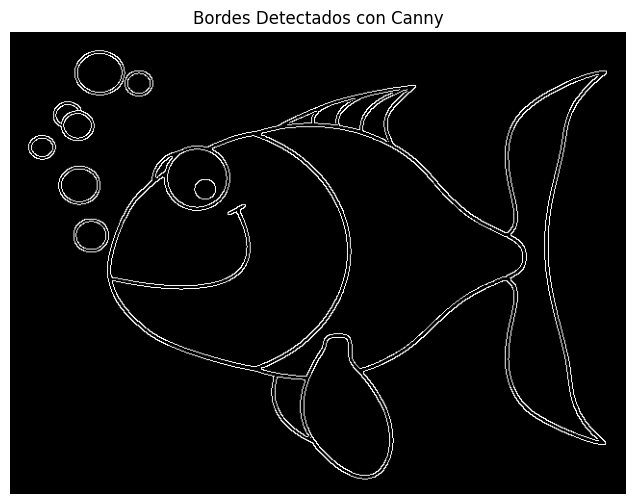

In [71]:
# %%

# Aplicar el detector de bordes de Canny
# canny(imagen, min , max)
edged = cv2.Canny(blurred, 30, 200)

# Mostrar los bordes detectados
display_img(edged, "Bordes Detectados con Canny")


 ## 5. Detección de Contornos
 Ahora que tenemos los bordes, usaremos la función `cv2.findContours()` para detectar los contornos en la imagen. Esta función encuentra contornos basándose en los bordes detectados.

In [72]:
# %%

# Detectar contornos en la imagen
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Imprimir el número de contornos encontrados
print("Número de Contornos Encontrados: ", len(contours))

Número de Contornos Encontrados:  49



 ## 6. Dibujo de Contornos
 Dibujaremos los contornos detectados sobre la imagen original usando `cv2.drawContours()`. Esto nos permitirá visualizar dónde se encuentran los contornos.

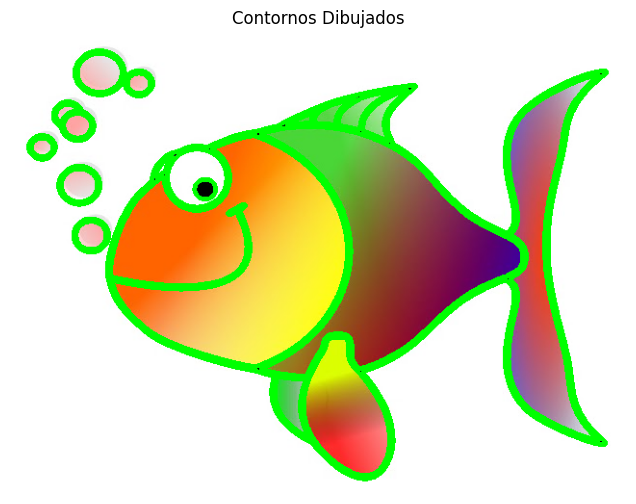

In [73]:
# %%

# Crear una copia de la imagen original para dibujar los contornos
image_contours = image.copy()

# Dibujar todos los contornos encontrados
cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 3)

# Mostrar la imagen con los contornos dibujados
display_img(image_contours, "Contornos Dibujados")


 ## 7. Detección del Contorno Más Grande
 Muchas veces, nos interesa encontrar el contorno más grande (por ejemplo, el objeto principal en la imagen). Utilizaremos la función `max()` para encontrar el contorno con el área más grande.

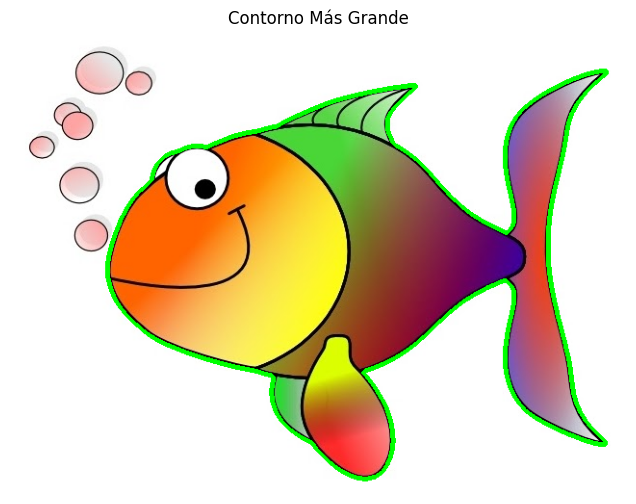

In [74]:
# %%

# Crear otra copia de la imagen para dibujar el contorno más grande
image_largest_contour = image.copy()

# Verificar que haya contornos detectados
if len(contours) != 0:
    # Encontrar el contorno con el área más grande
    c = max(contours, key=cv2.contourArea)

    # Dibujar el contorno más grande
    cv2.drawContours(image_largest_contour, [c], -1, (0, 255, 0), 3)

    # Mostrar la imagen con el contorno más grande
    display_img(image_largest_contour, "Contorno Más Grande")


 ## 8. Guardar los Resultados
 Guardaremos las imágenes generadas para poder revisarlas más tarde.

In [75]:
# %%

# Guardar las imágenes
cv2.imwrite('EdgedFish.jpg', edged)
cv2.imwrite('Contours.jpg', image_contours)
cv2.imwrite('LargestContour.jpg', image_largest_contour)

True


 ## 9. Funciones Adicionales de Detección de Contornos
 OpenCV proporciona varias opciones para detectar contornos:
 - `cv2.RETR_EXTERNAL`: Solo detecta los contornos externos.
 - `cv2.RETR_LIST`: Detecta todos los contornos pero no crea jerarquía.
 - `cv2.RETR_CCOMP`: Detecta todos los contornos y crea dos niveles de jerarquía.
 - `cv2.RETR_TREE`: Detecta todos los contornos y construye una jerarquía completa de contornos anidados.


 ## 10. Explicación Final del Código y Ejemplo Completo
 A continuación, presentamos un ejemplo completo que muestra cómo aplicar todo lo aprendido en un solo bloque de código.

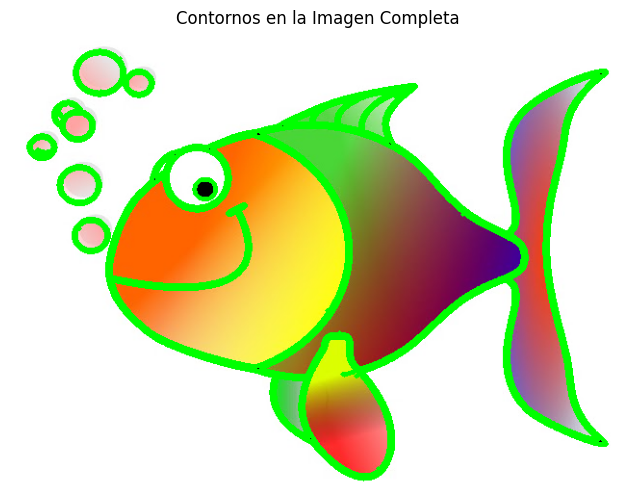

In [ ]:
# %%

# Código completo para detección de contornos y dibujo en una imagen
def detect_and_draw_contours(image_path):
    # Cargar la imagen
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(gray, 30, 200)
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar todos los contornos
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
    display_img(image, "Contornos en la Imagen Completa")

    # Guardar la imagen con contornos
    cv2.imwrite('FinalContours.jpg', image)

# Ejecutar la función con la imagen de ejemplo
ruta=dir+'images/bubblingFish.jpg'
detect_and_draw_contours(ruta)